<a href="https://colab.research.google.com/github/elembam/18S191/blob/Fall20-franklin-output/Efficient_frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.youtube.com/watch?v=f2BCmQBCwDs&t=1086s&ab_channel=AhmadBazzi

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 29.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
yf.pdr_override()

In [ ]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,22)

In [ ]:
goldman = web.get_data_yahoo("CEVA", start, end)
print (goldman)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-01-04  46.000000  48.040001  43.570000  44.720001  44.720001   280700
2021-01-05  44.090000  47.009998  44.090000  46.430000  46.430000   229300
2021-01-06  47.060001  48.790001  46.740002  48.160000  48.160000   234700
2021-01-07  49.930000  50.860001  49.110001  50.700001  50.700001   342700
2021-01-08  51.330002  51.939999  50.099998  50.910000  50.910000   179600
2021-01-11  50.119999  54.380001  50.119999  54.139999  54.139999   300200
2021-01-12  54.799999  56.799999  54.080002  55.540001  55.540001   295000
2021-01-13  55.849998  57.240002  55.450001  57.119999  57.119999   255100
2021-01-14  57.509998  59.400002  55.500000  55.669998  55.669998   301800
2021-01-15  55.340000  55.349998  52.840000  53.930000  53.930000   233500
2021-01-19  56.560001  65.68000

In [ ]:
ceva = web.get_data_yahoo("CEVA", start, end)
google = web.get_data_yahoo("GOOGL", start, end)
tesla = web.get_data_yahoo("TSLA", start, end)
zom = web.get_data_yahoo("ZOM", start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks = pd.concat([ceva['Close'],google['Close'],tesla['Close'],zom['Close']], axis=1)

In [ ]:
stocks.columns = ['CEVA','GOOGLE','TESLA', 'ZOM']
stocks

,CEVA,GOOGLE,TESLA,ZOM
Date,,,,
2021-01-04,44.720001,1726.130005,729.770020,0.350
2021-01-05,46.430000,1740.050049,735.109985,0.439
2021-01-06,48.160000,1722.880005,755.979980,0.410
2021-01-07,50.700001,1774.339966,816.039978,0.400
2021-01-08,50.910000,1797.829956,880.020020,0.484
2021-01-11,54.139999,1756.290039,811.190002,0.930
2021-01-12,55.540001,1737.430054,849.440002,1.300
2021-01-13,57.119999,1747.250000,854.409973,0.976
2021-01-14,55.669998,1730.920044,845.000000,1.010


In [ ]:
returns = stocks/stocks.shift(1)
returns

,CEVA,GOOGLE,TESLA,ZOM
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,1.038238,1.008064,1.007317,1.254286
2021-01-06,1.037260,0.990132,1.028390,0.933941
2021-01-07,1.052741,1.029869,1.079447,0.975610
2021-01-08,1.004142,1.013239,1.078403,1.210000
2021-01-11,1.063445,0.976894,0.921786,1.921488
2021-01-12,1.025859,0.989261,1.047153,1.397849
2021-01-13,1.028448,1.005652,1.005851,0.750769
2021-01-14,0.974615,0.990654,0.988987,1.034836


In [ ]:
logReturns = np.log(returns)
logReturns

,CEVA,GOOGLE,TESLA,ZOM
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.037525,0.008032,0.007291,0.226566
2021-01-06,0.036583,-0.009917,0.027995,-0.068342
2021-01-07,0.051397,0.029431,0.076448,-0.024693
2021-01-08,0.004133,0.013152,0.075481,0.190620
2021-01-11,0.061514,-0.023377,-0.081442,0.653100
2021-01-12,0.025530,-0.010797,0.046075,0.334935
2021-01-13,0.028051,0.005636,0.005834,-0.286657
2021-01-14,-0.025713,-0.009390,-0.011075,0.034243


In [ ]:
noOfPortfolios = 10000
weight = np.zeros((noOfPortfolios, 4))
expectedReturn = np.zeros(noOfPortfolios)
expectedVolatility = np.zeros(noOfPortfolios)
sharpeRatio = np.zeros(noOfPortfolios)

meanLogRet = logReturns.mean()
Sigma = logReturns.cov()
for k in range (noOfPortfolios):

  #generate random weight vector
  w = np.array(np.random.random(4))
  w = w/np.sum(w)
  weight[k,:] = w
  #expected log return
  expectedReturn [k] = np.sum ( meanLogRet * w)
  #expected volatility
  expectedVolatility[k] = np.sqrt(np.dot(w.T,np.dot(Sigma,w)) )
  #sharpe ratio
  sharpeRatio [k] = expectedReturn[k]/expectedVolatility[k] 

In [ ]:
expectedReturn

array([0.05059951, 0.0232885 , 0.04313758, ..., 0.02490802, 0.03313764,
       0.03428606])

In [ ]:
maxIndex = sharpeRatio.argmax()
weight[maxIndex,:]

array([0.22306858, 0.46388187, 0.24120347, 0.07184609])

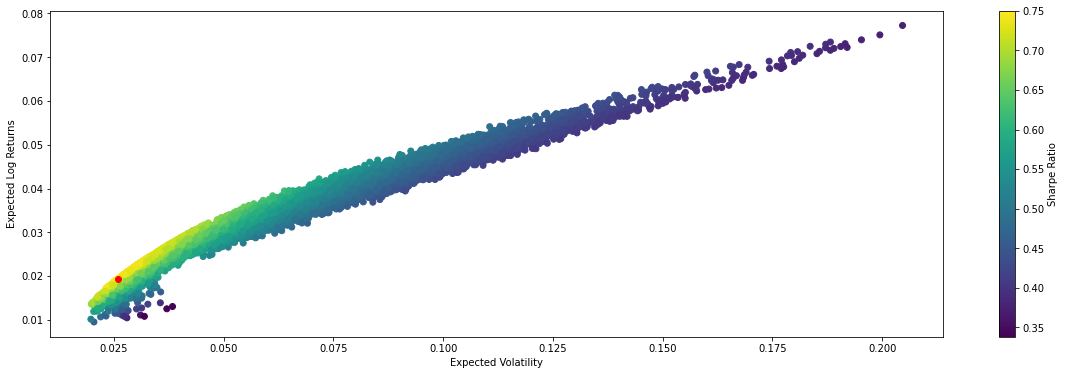

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(expectedVolatility, expectedReturn, c=sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], c='red')
plt.show()

In [ ]:
from scipy.optimize import minimize

def negativeSR(w):
  w = np.array(w)
  R = np.sum(meanLogRet*w)
  V = np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
  SR = R/V
  return -1*SR

def checkSumToOne(w):
  return np.sum(w)-1

  
bounds = ((0,1),(0,1),(0,1),(0,1))
constraints = ({'type':'eq','fun':checkSumToOne})
w0 = [0.25,0.25,0.25,0.25]
w_opt = minimize(negativeSR,w0,method='SLSQP', bounds=bounds,constraints=constraints)
w_opt

     fun: -0.7506241503054399
     jac: array([-0.00034361, -0.00013661,  0.00027948,  0.00107778])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.23857765, 0.45432438, 0.2341363 , 0.07296167])